# PROJECT 2
Iris analysis 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score




In [2]:
iris_df= pd.read_csv("Iris.csv")
iris_df =iris_df.set_index("Id")

In [3]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

iris_df= iris_df.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
iris_df.head()

In [4]:
X= iris_df.iloc[:,:-1].values
#y= iris_df.iloc[:,-1].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
print("Training sets shape: {},{}".format(X_train.shape,y_train.shape))
print("Testing sets shape: {},{}".format(X_test.shape,y_test.shape))

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.190687924796634, 29.90537429982511, 27.927882157034986, 25.955497086247092]


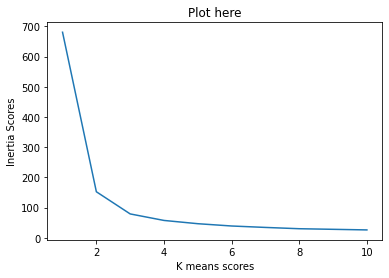

In [5]:
max_clusters= 11
scores= []
for i in range(1,max_clusters):
    k_means= KMeans(init="k-means++",n_clusters=i,random_state=0,max_iter=300,n_init=10)
    k_means.fit(X)
    scores.append(k_means.inertia_)
print(scores)
plt.plot(range(1,11),scores)
plt.title("Plot here")
plt.xlabel("K means scores")
plt.ylabel("Inertia Scores")
plt.show()

    
    

In [6]:
k=3 
k_means= KMeans(n_clusters=k,init="k-means++",random_state=0)
y_kmeans= k_means.fit_predict(X)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


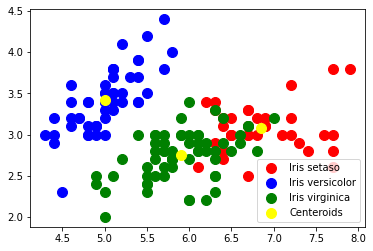

In [14]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c="red",label="Iris setaso")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c="blue",label="Iris versicolor")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c="green",label="Iris virginica")   


plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="yellow",label="Centeroids")
plt.legend()
plt.show()